In [5]:
import numpy as np
import pickle as pickle
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

In [ ]:
def visualize_process(history, objective_labels=["Objective 1", "Objective 2"], interval=1):
    num_generations = len(history)
    # Determine the bounds of the objective space across all generations
    min_obj1 = min(np.min(gen_data[:, 0]) for gen_data in history)
    max_obj1 = max(np.max(gen_data[:, 0]) for gen_data in history)
    min_obj2 = min(np.min(gen_data[:, 1]) for gen_data in history)
    max_obj2 = max(np.max(gen_data[:, 1]) for gen_data in history)
    padding_obj1 = (max_obj1 - min_obj1) * 0.1
    padding_obj2 = (max_obj2 - min_obj2) * 0.1
    xlim = (min_obj1 - padding_obj1, max_obj1 + padding_obj1)
    ylim = (min_obj2 - padding_obj2, max_obj2 + padding_obj2)

    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter([], [])
    ax.set_xlabel(objective_labels[0])
    ax.set_ylabel(objective_labels[1])
    ax.set_title("Population Evolution")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True)

    def update(frame):
        data = history[frame]
        scatter.set_offsets(data)
        ax.set_title(f"Generation {frame + 1}")
        return scatter,

    ani = animation.FuncAnimation(fig, update, frames=num_generations, interval=interval, blit=True)
    plt.close(fig)
    return ani


In [19]:
from matplotlib.animation import PillowWriter

path = r"D:\EnhanceGARAG\nsgaii_logs\ngsgaii_golden_answer_0.2_0.pkl"
with open(path, "rb") as f:
    history = pickle.load(f)

ani = visualize_process(history)
HTML(ani.to_jshtml())

ani.save("process_0 .gif", writer=PillowWriter(fps=10))

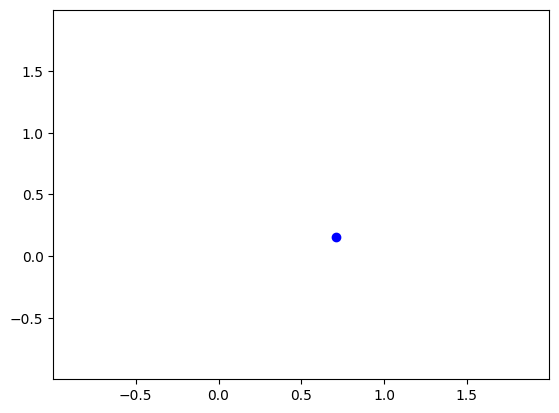

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def create_animation(history):
    fig, ax = plt.subplots()
    point, = ax.plot([], [], 'bo')

    ax.set_xlim(np.min(history[:, 1]) - 1, np.max(history[:, 1]) + 1)
    ax.set_ylim(np.min(history[:, 2]) - 1, np.max(history[:, 2]) + 1)

    def init():
        point.set_data([], [])
        return point,

    def update(i):
        x = history[i, 1]
        y = history[i, 2]
        point.set_data([x], [y])  # <- Phải là list hoặc array
        return point,

    ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True)
    return ani

# Ví dụ sử dụng



(500, 3)


RuntimeError: x must be a sequence

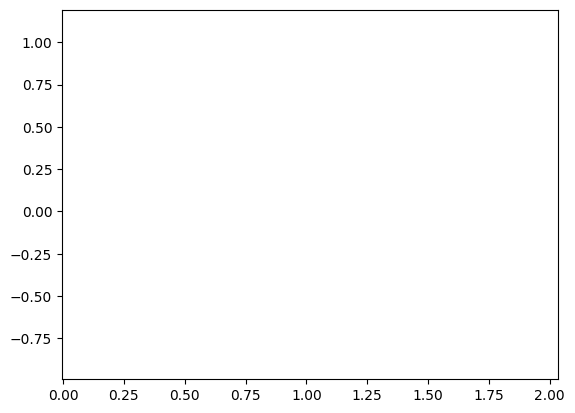

In [ ]:
from matplotlib.animation import PillowWriter

path = r"D:\EnhanceGARAG\ga_logs\ga_golden_answer_0.2_0.npy"
history = np.load(path, allow_pickle=True)
print(history.shape)
ani = create_animation(history)
print(ani)
HTML(ani.to_jshtml())
